<h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma"> بسم الله الرحمن الرحیم</div></center></h1>

<h1><center><div style="direction:rtl;font-family:B Lotus, B Nazanin, Tahoma">
Cifar10 Dataset classification using Fully connected Neural Network</div></center></h1>


# <div style="direction:ltr;text-align:left;font-family:B Lotus, B Nazanin, Tahoma">  Load required libraries</div>

In [3]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

2022-03-18 19:57:30.167370: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-18 19:57:30.167415: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## <div style="direction:ltr;text-align:left;font-family:B Lotus, B Nazanin, Tahoma">About Cifar10 Dataset</div>
<div style="direction:ltr;text-align:left;font-family:Tahoma">
<br>This dataset of color images in the size of 32 by 32 and in 10 different classes, including cars, trucks, horses, etc., is available in the framework of Keras and we use the same.
<br><br>
You can read more about this data set from the site of this data set:<br>
</div>

https://www.cs.toronto.edu/~kriz/cifar.html

# + Load Dataset

In [4]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## <div style="direction:ltr;text-align:left;font-family:B Lotus, B Nazanin, Tahoma">Take a look at the dataset ...</div>
<div style="direction:ltr;text-align:left;font-family:Tahoma">Change the index of this photo and see a few more images in this dataset.</div>

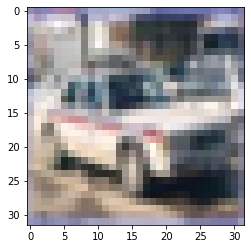

In [5]:
plt.imshow(x_train[65]) # change the index '65'

# + Preprocessing

### <div style="direction:ltr;text-align:left;font-family:B Lotus, B Nazanin, Tahoma">Convert 3 channel images into grayscale</div>

In [6]:
number_of_pictures_train = x_train.shape[0]
number_of_pictures_test = x_test.shape[0]

number_of_pictures_train

50000

In [7]:
x_train_gray = []
x_test_gray = []

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114]).astype(int)

for i in range(0,number_of_pictures_train):
    x_train_gray.append(rgb2gray(x_train[i])) # storing converted images

x_train_gray = np.array(x_train_gray) # convert list to np array

for i in range(0,number_of_pictures_test):
    x_test_gray.append(rgb2gray(x_test[i]))

x_test_gray = np.array(x_test_gray)

### <div style="direction:ltr;text-align:left;font-family:B Lotus, B Nazanin, Tahoma">Change datatype of features to float32</div>

In [8]:
x_train_gray = x_train_gray.astype('float32')
x_test_gray =  x_test_gray.astype('float32')

### <div style="direction:ltr;text-align:left;font-family:B Lotus, B Nazanin, Tahoma">Normalizing</div>

In [9]:
x_train_gray /= 255
x_test_gray /= 255

### <div style="direction:ltr;text-align:left;font-family:B Lotus, B Nazanin, Tahoma">Reshape features to only one dimension</div>

In [10]:
x_train_gray = x_train_gray.reshape(number_of_pictures_train,-1) # (... , 32 , 32) ==> (...,32*32)
x_test_gray =  x_test_gray.reshape(number_of_pictures_test,-1)

x_train_gray.shape # print

(50000, 1024)

In [11]:
dimension = list(x_train_gray.shape)[1] # (size,dimension)
dimension

1024

### <div style="direction:ltr;text-align:left;font-family:B Lotus, B Nazanin, Tahoma">Convert numeric labels to one-hot format</div>

In [12]:
numof_classes = len(np.unique(y_test)) # Storing for using as number of last layer neurons

y_train = keras.utils.to_categorical(y_train,num_classes=numof_classes)
y_test = keras.utils.to_categorical(y_test,num_classes=numof_classes)

numof_classes

10

# + Initial Neural Network

In [13]:
from keras.models import Sequential # to create Sequential layers
from keras.layers import Dense, Dropout

model = Sequential() # Initial Model
model.add(Dense(101 , activation='relu' , input_dim =x_train_gray.shape[1])) # 1st Layer
model.add(Dense(101 , activation='relu' )) # 2nd Layer
model.add(Dropout(0.2)) # Droupout ( kill 20% of neurons)
model.add(Dense(101 , activation='relu' )) # 3rd Layer
model.add(Dropout(0.2)) 
model.add(Dense(101 , activation='relu' )) # 4th Layer
model.add(Dropout(0.2)) 
model.add(Dense(101 , activation='relu' )) # 5th Layer
model.add(Dropout(0.2)) 
model.add(Dense(numof_classes, activation='softmax')) # Final Layer

model.summary() # get info about model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 101)               103525    
                                                                 
 dense_1 (Dense)             (None, 101)               10302     
                                                                 
 dropout (Dropout)           (None, 101)               0         
                                                                 
 dense_2 (Dense)             (None, 101)               10302     
                                                                 
 dropout_1 (Dropout)         (None, 101)               0         
                                                                 
 dense_3 (Dense)             (None, 101)               10302     
                                                                 
 dropout_2 (Dropout)         (None, 101)               0

2022-03-18 19:57:43.423925: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-18 19:57:43.424018: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-18 19:57:43.424061: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mahdi-X550IK): /proc/driver/nvidia/version does not exist
2022-03-18 19:57:43.424707: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# + Compile

In [14]:
opt_rms = keras.optimizers.RMSprop(learning_rate=0.001,decay=1e-6) # define 
model.compile(loss='categorical_crossentropy',
              optimizer=opt_rms,
              metrics=['accuracy'])

# + Learning

In [15]:
history = model.fit(x_train_gray, 
          y_train,
          epochs=24,
          batch_size= 64,
          validation_split=0.2)

2022-03-18 19:57:43.949263: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 163840000 exceeds 10% of free system memory.


Epoch 1/24
625/625 [==============================] - 9s 12ms/step - loss: 2.1666 - accuracy: 0.1848 - val_loss: 2.0301 - val_accuracy: 0.2633
Epoch 2/24
625/625 [==============================] - 7s 11ms/step - loss: 2.0428 - accuracy: 0.2565 - val_loss: 2.0024 - val_accuracy: 0.2760
Epoch 3/24
625/625 [==============================] - 7s 11ms/step - loss: 1.9904 - accuracy: 0.2816 - val_loss: 1.9242 - val_accuracy: 0.3037
Epoch 4/24
625/625 [==============================] - 7s 12ms/step - loss: 1.9549 - accuracy: 0.2980 - val_loss: 1.8769 - val_accuracy: 0.3275
Epoch 5/24
625/625 [==============================] - 7s 11ms/step - loss: 1.9224 - accuracy: 0.3106 - val_loss: 1.8760 - val_accuracy: 0.3189
Epoch 6/24
625/625 [==============================] - 7s 11ms/step - loss: 1.9020 - accuracy: 0.3183 - val_loss: 1.8548 - val_accuracy: 0.3365
Epoch 7/24
625/625 [==============================] - 7s 11ms/step - loss: 1.8857 - accuracy: 0.3289 - val_loss: 1.8408 - val_accuracy: 0.3341

# + visualization

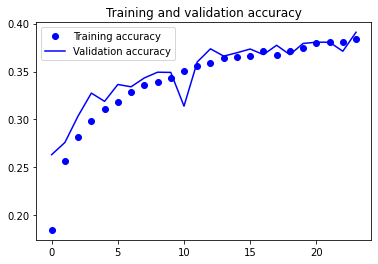

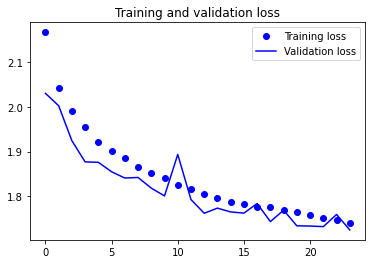

In [16]:
accuracy = history.history['accuracy'] 
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy') # plot the accuracy
plt.plot(epochs, val_acc, 'b', label='Validation accuracy') # plot the val accuracy

plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss') # plot the loss
plt.plot(epochs, val_loss, 'b', label='Validation loss') # plot the val loss

plt.title('Training and validation loss')
plt.legend()

plt.show()

# + Evaluatution

In [17]:
# Test on unseen data
results = model.evaluate(x_test_gray, y_test)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

313/313 [==============================] - 2s 5ms/step - loss: 1.7222 - accuracy: 0.3868
Final test set loss: 1.722194
Final test set accuracy: 0.386800
